In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('Statewise Inventory of Geological Resources of Coal- No. of Mines by Type.csv')
display(df)

,Rowid,Country,State lgd code,State,Year,Coal type,Open cast mines,Underground mines,Mixed mines
0,1,India,1,Jammu And Kashmir,2019-20,Coal,0.0,1.951318,0.0
1,2,India,8,Rajasthan,2019-20,Lignite,5.0,NaN,NaN
2,3,India,9,Uttar Pradesh,2019-20,Coal,5.0,0.000000,0.0
3,4,India,12,Arunachal Pradesh,2019-20,Coal,0.0,0.000000,0.0
4,5,India,18,Assam,2019-20,Coal,2.0,1.000000,0.0
5,6,India,19,West Bengal,2019-20,Coal,17.0,43.000000,10.0
6,7,India,20,Jharkhand,2019-20,Coal,74.0,33.000000,12.0
7,8,India,21,Odisha,2019-20,Coal,21.0,8.000000,0.0
8,9,India,22,Chhattisgarh,2019-20,Coal,24.0,29.000000,1.0
9,10,India,23,Madhya Pradesh,2019-20,Coal,22.0,36.000000,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rowid              15 non-null     int64  
 1   Country            15 non-null     object 
 2   State lgd code     15 non-null     int64  
 3   State              15 non-null     object 
 4   Year               15 non-null     object 
 5   Coal type          15 non-null     object 
 6   Open cast mines    15 non-null     float64
 7   Underground mines  12 non-null     float64
 8   Mixed mines        12 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.2+ KB


In [4]:
df.describe()

,Rowid,State lgd code,Open cast mines,Underground mines,Mixed mines
count,15.000000,15.000000,15.000000,12.000000,12.000000
mean,8.000000,20.666667,16.000000,16.250000,2.083333
std,4.472136,10.286376,19.628696,16.404157,4.231018
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.500000,15.000000,2.500000,0.762171,0.000000
50%,8.000000,21.000000,10.000000,12.000000,0.000000
75%,11.500000,25.500000,21.500000,30.000000,1.250000
max,15.000000,37.000000,74.000000,43.000000,12.000000


In [5]:
x=df.isna().sum()   #df. isna(). sum() returns the number of missing values in each column.
print(x)

Rowid                0
Country              0
State lgd code       0
State                0
Year                 0
Coal type            0
Open cast mines      0
Underground mines    3
Mixed mines          3
dtype: int64


There are missing values in the data

In [6]:
for col in df.columns.values:
  unique_val = pd.unique(df[col])
  print('Column ' + '"'+ col+'"'  + ' has ' + str(len(unique_val)) + ' unique values')

Column "Rowid" has 15 unique values
Column "Country" has 1 unique values
Column "State lgd code" has 15 unique values
Column "State" has 15 unique values
Column "Year" has 1 unique values
Column "Coal type" has 2 unique values
Column "Open cast mines" has 12 unique values
Column "Underground mines" has 12 unique values
Column "Mixed mines" has 6 unique values


In [7]:
states=df['State'].unique()
print(states)

['Jammu And Kashmir' 'Rajasthan' 'Uttar Pradesh' 'Arunachal Pradesh'
 'Assam' 'West Bengal' 'Jharkhand' 'Odisha' 'Chhattisgarh'
 'Madhya Pradesh' 'Gujarat' 'Maharashtra' 'Tamil Nadu' 'Telangana'
 'Ladakh']


In [9]:
df2 = df.groupby('State').apply(lambda x: x['Open cast mines'].unique().sum())
print(df2)

State
Arunachal Pradesh     0.0
Assam                 2.0
Chhattisgarh         24.0
Gujarat              10.0
Jammu And Kashmir     0.0
Jharkhand            74.0
Ladakh                0.0
Madhya Pradesh       22.0
Maharashtra          38.0
Odisha               21.0
Rajasthan             5.0
Tamil Nadu            3.0
Telangana            19.0
Uttar Pradesh         5.0
West Bengal          17.0
dtype: float64


In [10]:
df1=df2.sort_values()
print(df1)

State
Arunachal Pradesh     0.0
Jammu And Kashmir     0.0
Ladakh                0.0
Assam                 2.0
Tamil Nadu            3.0
Rajasthan             5.0
Uttar Pradesh         5.0
Gujarat              10.0
West Bengal          17.0
Telangana            19.0
Odisha               21.0
Madhya Pradesh       22.0
Chhattisgarh         24.0
Maharashtra          38.0
Jharkhand            74.0
dtype: float64


Open-pit mining, also known as opencast mining, is a surface mining technique that extracts minerals from an open pit in the ground. Courtesy:Google

<AxesSubplot:xlabel='State', ylabel='Open Cast Mines'>

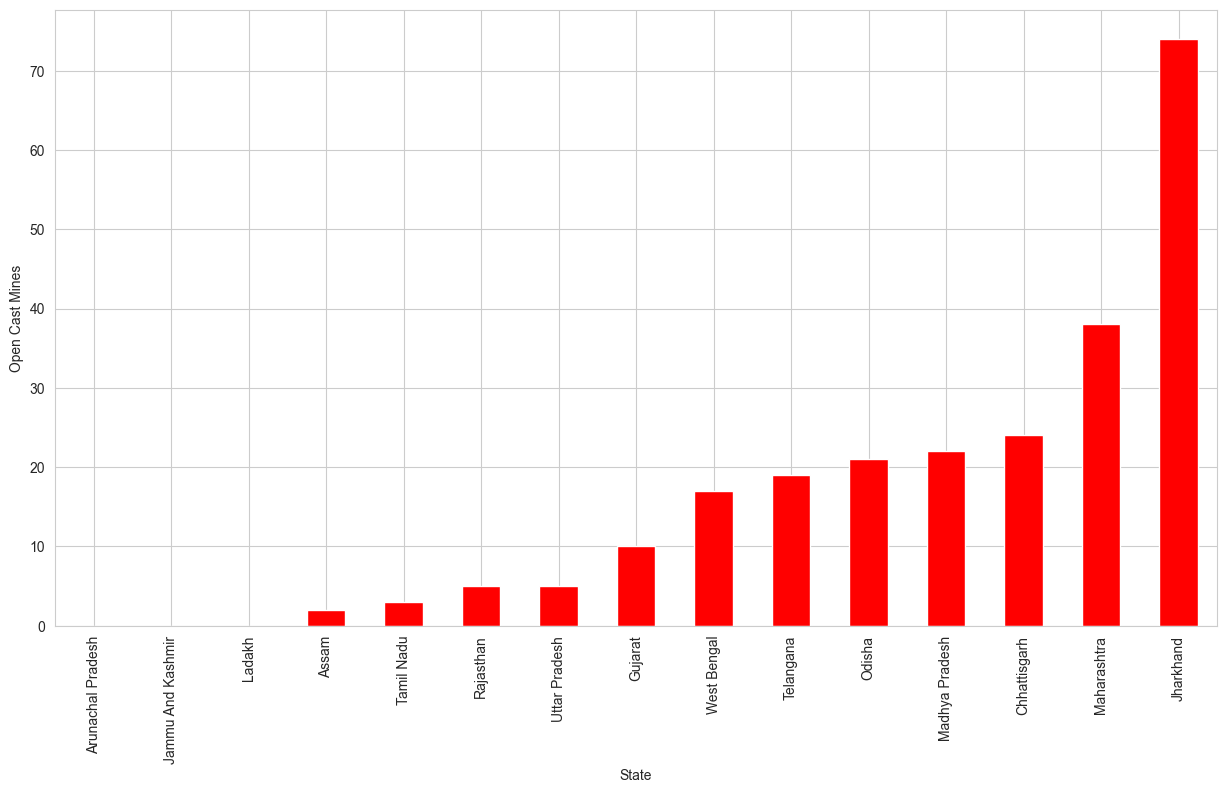

In [11]:
df1.plot(kind='bar', y='Coal Produced',figsize=(15,8),ylabel='Open Cast Mines',color='red')

In [13]:
dfy = df.groupby('State').apply(lambda x: x['Open cast mines'].unique().sum())
print(dfy)

State
Arunachal Pradesh     0.0
Assam                 2.0
Chhattisgarh         24.0
Gujarat              10.0
Jammu And Kashmir     0.0
Jharkhand            74.0
Ladakh                0.0
Madhya Pradesh       22.0
Maharashtra          38.0
Odisha               21.0
Rajasthan             5.0
Tamil Nadu            3.0
Telangana            19.0
Uttar Pradesh         5.0
West Bengal          17.0
dtype: float64


Text(0, 0.5, 'Open Cast Mines')

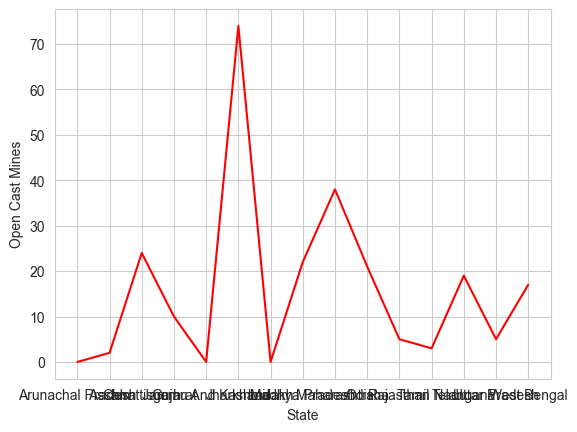

In [14]:
plt.plot(dfy,'red')
plt.xlabel("State")
plt.ylabel("Open Cast Mines")

In [15]:
dfs = df.groupby('Coal type').apply(lambda x: x['State'].unique().sum())
print(dfs)
print('\n')

# dfs2 = df.groupby('Coal type').apply(lambda x: x['Qualtity of coal produced'].unique().sum())
# print(dfs2)

Coal type
Coal       Jammu And KashmirUttar PradeshArunachal Prades...
Lignite                           RajasthanGujaratTamil Nadu
dtype: object


